# POLYNOMIAL REGRESSION
---

```julia
versioninfo() # -> v"1.11.2"
```

In [1]:
cd(@__DIR__)

In [2]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


Import librairies

In [3]:
using CSV, DataFrames
using Plots
using MLJ

Read data from file

In [4]:
df = CSV.read("../../Datasets/Position_Salaries.csv", DataFrame)
schema(df)

┌──────────┬──────────┬──────────┐
│ names    │ scitypes │ types    │
├──────────┼──────────┼──────────┤
│ Position │ Textual  │ String31 │
│ Level    │ Count    │ Int64    │
│ Salary   │ Count    │ Int64    │
└──────────┴──────────┴──────────┘


Unpack data

In [5]:
x = select(df, :Level)
n = 4
X = zeros(size(x)[1], n) # length(x.Level)
y = df.Salary

10-element Vector{Int64}:
   45000
   50000
   60000
   80000
  110000
  150000
  200000
  300000
  500000
 1000000

In [6]:
X_ = Matrix{Float32}(undef, length(x.Level), n)

10×4 Matrix{Float32}:
 2.93295f23  2.93193f23  0.0  0.0
 4.3932f-41  4.3932f-41  0.0  0.0
 2.93321f23  2.93374f23  0.0  0.0
 4.3932f-41  4.3932f-41  0.0  0.0
 2.93474f23  2.93195f23  0.0  0.0
 4.3932f-41  4.3932f-41  0.0  0.0
 9.77829f22  9.77846f22  0.0  0.0
 4.3932f-41  4.3932f-41  0.0  0.0
 2.93346f23  0.0         0.0  0.0
 4.3932f-41  0.0         0.0  0.0

In [7]:
for i in 1:n
    X_[:, i] = x.Level .^ i
end

In [8]:
X = Tables.table(X_)

Tables.MatrixTable{Matrix{Float32}} with 10 rows, 4 columns, and schema:
 :Column1  Float32
 :Column2  Float32
 :Column3  Float32
 :Column4  Float32

Partition of data

In [9]:
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=123)

([8, 1, 10, 6, 9, 4, 5, 7], [3, 2])

Load linear regression model

In [10]:
sc_ = Standardizer()

Standardizer(
  features = Symbol[], 
  ignore = false, 
  ordered_factor = false, 
  count = false)

In [11]:
sc = machine(sc_, X)

untrained Machine; caches model-specific representations of data
  model: Standardizer(features = Symbol[], …)
  args: 
    1:	Source @183 ⏎ Table{AbstractVector{Continuous}}


In [12]:
fit!(sc, rows=train)

[ Info: Training machine(Standardizer(features = Symbol[], …), …).


trained Machine; caches model-specific representations of data
  model: Standardizer(features = Symbol[], …)
  args: 
    1:	Source @183 ⏎ Table{AbstractVector{Continuous}}


In [13]:
Xtrain = MLJ.transform(sc, rows=train)

(Column1 = Float32[0.60024506, -1.8007352, 1.2862394, -0.0857493, 0.94324225, -0.77174366, -0.4287465, 0.2572479],
 Column2 = Float32[0.51967466, -1.3511541, 1.5887196, -0.3118048, 1.0245014, -0.9057187, -0.6384574, 0.07423924],
 Column3 = Float32[0.39440262, -1.0633893, 1.7865797, -0.45003265, 1.0134649, -0.88366157, -0.70963943, -0.087724276],
 Column4 = Float32[0.26536164, -0.8888135, 1.9294031, -0.52381796, 0.96012145, -0.81694174, -0.71293914, -0.21237385],)

In [14]:
Xtest = MLJ.transform(sc, rows=test)

(Column1 = Float32[-1.1147408, -1.457738],
 Column2 = Float32[-1.1135886, -1.262067],
 Column3 = Float32[-0.98921597, -1.0434196],
 Column4 = Float32[-0.8662655, -0.88458574],)

In [15]:
LR = @load LinearRegressor pkg=MLJLinearModels

[ Info: For silent loading, specify `verbosity=0`. 


import MLJLinearModels ✔


MLJLinearModels.LinearRegressor

In [16]:
lr_ = LR()

LinearRegressor(
  fit_intercept = true, 
  solver = nothing)

Add extra features & scaling

Train & fit the regression model

In [17]:
lr = machine(lr_, X, y)

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJLinearModels.LinearRegressor` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{Table{AbstractVector{Continuous}}, AbstractVector{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{Continuous}}
└ @ MLJBase ~/.julia/packages/MLJBase/7nGJF/src/machines.jl:237


untrained Machine; caches model-specific representations of data
  model: LinearRegressor(fit_intercept = true, …)
  args: 
    1:	Source @858 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @782 ⏎ AbstractVector{Count}


In [18]:
fit!(lr, rows=train)

[ Info: Training machine(LinearRegressor(fit_intercept = true, …), …).
┌ Info: Solver: MLJLinearModels.Analytical
│   iterative: Bool false
└   max_inner: Int64 200


trained Machine; caches model-specific representations of data
  model: LinearRegressor(fit_intercept = true, …)
  args: 
    1:	Source @858 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @782 ⏎ AbstractVector{Count}


In [19]:
params = fitted_params(lr)

(coefs = Pair{Symbol, Float32}[:Column1 => -390768.06, :Column2 => 157360.84, :Column3 => -23421.137, :Column4 => 1228.6157],
 intercept = 301127.3f0,)

Predict & measure the error

In [20]:
yhat = predict(lr, rows=train)

8-element Vector{Float32}:
 286865.3
  45527.58
 994551.3
 154829.81
 517381.3
  71401.31
 121550.81
 192889.31

In [21]:
println("Error is $(sum(( yhat.- y[train] ).^2) ./ length(y[train]) )")

Error is 9.823052e7


Plot & compare

In [22]:
using LaTeXStrings

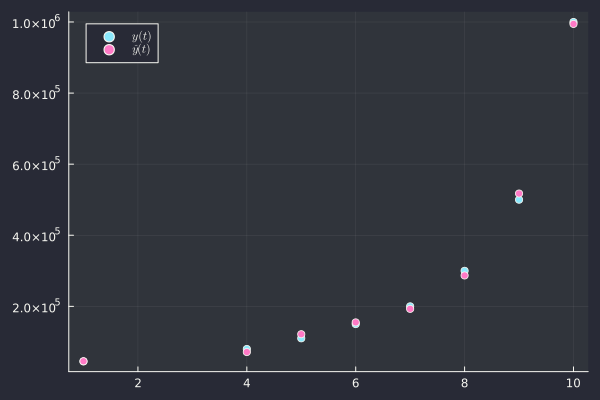

In [23]:
scatter(x.Level[train], y[train], label=L"y(t)")
scatter!(x.Level[train], yhat, label=L"\hat{y}(t)")